In [172]:
import os
import torch
import numpy as np
import diffusers
from diffusers import AutoencoderKL

In [173]:
import matplotlib.pyplot as plt

(80, 624)


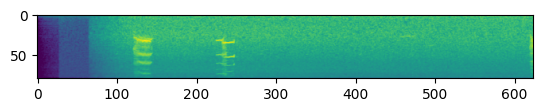

In [229]:
test_id = "/blob/v-yuancwang/WavCaps/BBC/mel/NHU05017176.npy"
test_mel = np.load(test_id)[:,:624]
print(test_mel.shape)
plt.imshow(test_mel)

In [ ]:
vae = AutoencoderKL.from_pretrained("/blob/v-yuancwang/AudioEditingModel/VAE_GAN/checkpoint-50000/vae")
vae.requires_grad_(False)

In [231]:
test_mel_tensor = np.expand_dims(np.expand_dims(test_mel, 0), 0)
test_mel_tensor = torch.Tensor(test_mel_tensor)
test_mel_tensor.shape

torch.Size([1, 1, 80, 624])

In [232]:
with torch.no_grad():
    posterior = vae.encode(test_mel_tensor).latent_dist
    z = posterior.sample()
    vae_output = vae.decode(z).sample

(80, 624)


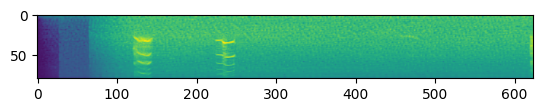

In [233]:
vae_res = vae_output[0][0].numpy()
print(vae_res.shape)
plt.imshow(vae_res)

In [ ]:
vae = AutoencoderKL.from_pretrained("/blob/v-yuancwang/AudioEditingModel/VAE_GAN/checkpoint-40000/vae")
vae.requires_grad_(False)

In [235]:
test_mel_tensor = np.expand_dims(np.expand_dims(test_mel, 0), 0)
test_mel_tensor = torch.Tensor(test_mel_tensor)
test_mel_tensor.shape

torch.Size([1, 1, 80, 624])

In [236]:
with torch.no_grad():
    posterior = vae.encode(test_mel_tensor).latent_dist
    z = posterior.sample()
    vae_output = vae.decode(z).sample

(80, 624)


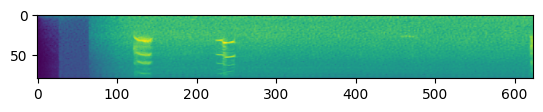

In [237]:
vae_res = vae_output[0][0].numpy()
print(vae_res.shape)
plt.imshow(vae_res)